In [1]:
from fastai.text import *

In [2]:
path = "../input/review_polarity/txt_sentoken/"

In [3]:
bs = 48

In [4]:
np.random.seed(42)
data = (TextList.from_folder(path)
                        .split_by_rand_pct(0.1)
                        .label_from_folder()
                        .databunch(bs=bs))

In [5]:
data.save("/kaggle/working/data.pkl")

In [6]:
data.show_batch()

text,target
"xxbos "" say , any of you know how to madison ? "" \n --- brad "" asshole "" majors ( barry bostwick ) shows just how unhip he is after watching the kooky xxunk wrap up their ode to the time warp in the cult classic the rocky horror picture show . \n the story behind the rocky horror picture show is one of legend . \n",pos
"xxbos i remember seeing the trailer of the black cauldron on the pinocchio video . \n it really scared me , and i did n't want to go see it . \n however , after i heard about how wonderful it was , i wanted to see it . \n i did n't get a chance to do so , until now . \n the film",pos
"xxbos natural born killers is really a very simple story that , in essence , has already been told in bonnie & clyde with some major variations in emphasis , mood and degree . \n both films xxunk "" outlaws , "" in one case bank robbers and killers and in the other mass murderers . \n both relate the story of a couple liberated by love .",pos
"xxbos * * * the following review contains spoilers * * * \n "" it 's just . . . \n the way . . . \n we are . "" \n --- a rapist ( matt xxunk ) responds to supergirl 's ( helen slater ) xxunk as to why she 's being attacked , an example of the mind - numbingly bad dialogue in",neg
"xxbos seen may 19 , 1999 at 5 p . m . at the crossgates cinema 18 ( guilderland , n . y . ) , theater # 1 , with my brother john for $ 8 . 50 . \n [ theater rating : * * * * : excellent seats , sound and picture ] \n ( critic 's note : this review is the longest",pos


In [7]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxeos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 ',']

In [8]:
data.train_ds[0][0]

Text xxbos it is hard to imagine that a movie which includes abortion and incest as prominent plot devices could be so sensitive , so delicate , so insightful and yes , even so enjoyable . 
  somehow , the cider house rules manages to keep an even xxunk in the face of the harsh subject matter and allows a substantial amount of heart to shine through . 
  set in the 1940 's , the film tells the story of a unique young man named homer wells ( tobey maguire , ride with the devil ) . 
  an orphan , twice rejected as an xxunk by possible adoptive parents , he grows up in the care and under the tutelage of dr . xxunk larch ( michael caine , little voice ) , father figure to the orphans of st . cloud , obstetrician or xxunk to the unhappily pregnant women who come there seeking his help . 
  figuring that as long as homer was going to stay at the orphanage , he might as well be of use , dr . larch begins teaching him all he knows about xxunk . 
  soon homer is delivering babies like a profess

In [9]:
data.train_ds[0][0].data[:10]

array([   2,   21,   17,  266,   16, 1126,   22,   13,   42,   64])

In [10]:
np.random.seed(42)
data_lm = (TextList.from_folder(path)
                        .split_by_rand_pct(0.1)
                        .label_for_lm()
                        .databunch(bs=bs))

In [11]:
data_lm.show_batch()

idx,text
0,"the 1940 's , the film tells the story of a unique young man named homer wells ( tobey maguire , ride with the devil ) . \n an orphan , twice rejected as an xxunk by possible adoptive parents , he grows up in the care and under the tutelage of dr . xxunk larch ( michael caine , little voice ) , father figure to the orphans"
1,"single building exploded . \n this , hartley 's seventh feature , is contemplative about "" the artist "" ; fortunately , we never get a sampling of simon 's work , and it 's a testament to the actors and the screenplay that by the end we can surmise what sort of thoughts would pour from these writers ' xxunk . \n xxbos kevin smith is like"
2,"wife 's tuna xxunk . \n "" so , "" you ask , "" where is he now ? "" \n mr . kaplan actually spends much of his time these days playing professional high - stakes poker . \n that 's right . \n i 'm not sure if it 's his main source of income , but from what i 've heard , the"
3,"was neat . \n having said that , i did n't think the first hour needed to be as long as it was , and the film did have me tinkering on the bridge of believability when the "" fake "" jackal met with the "" real "" jackal 's girlfriend without much xxunk on her part , but all in all , not too many complaints in a"
4,"everyone involved . \n let 's just hope they make a thousand sequels . \n [ sorry , i had to get the lame joke in . . . \n forgive me . ] \n xxbos originally entitled dancing about architecture ( i . e . \n "" talking about love is like dancing about architecture "" ) , but changed because it sounded too"


In [12]:
learn = language_model_learner(data_lm, arch=AWD_LSTM, drop_mult=0.3, model_dir="/tmp/model/")

In [13]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


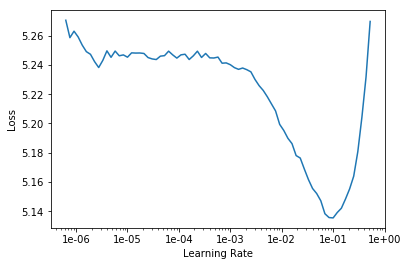

In [14]:
learn.recorder.plot(skip_end=15)

In [15]:
learn.fit_one_cycle(1, 3e-02, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.627384,4.365340,0.278990,00:49


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


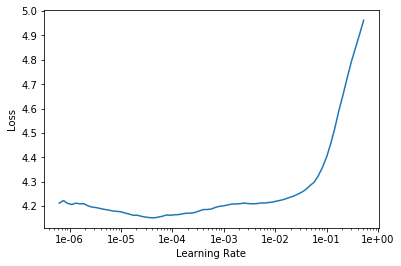

In [16]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [17]:
learn.fit_one_cycle(10, 3e-04, moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.148184,4.326283,0.281718,00:58
1,4.059402,4.266865,0.286838,00:58
2,4.003819,4.222210,0.291916,00:58
3,3.894475,4.190765,0.295098,00:58
4,3.844278,4.166241,0.297328,00:58
5,3.756064,4.157764,0.298305,00:58


In [18]:
TEXT = "Avengers is a "
N_WORDS = 30
N_SENTENCES = 2

print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))


Avengers is a  series of pictures that have been showing on television for over a century . 
  like the first one , " scream 2 " 's title is " cape city
Avengers is a  film that takes place in the near future when the avengers is being released . 
  at first , the camera is so utterly unbelievable that it 's just too


In [19]:
TEXT = "My sister watched that movie because"
N_WORDS = 10
N_SENTENCES = 2

print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))


My sister watched that movie because it 's a great film . 
  this film opens
My sister watched that movie because of her desire to have a comedy and a story


In [20]:
learn.save('/kaggle/working/fine_tuned')

In [21]:
learn.save_encoder('fine_tuned_enc')

In [22]:
learn = text_classifier_learner(data, arch=AWD_LSTM, drop_mult=0.3, model_dir="/tmp/model/")

In [23]:
learn.load_encoder('fine_tuned_enc')
learn.freeze()

In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


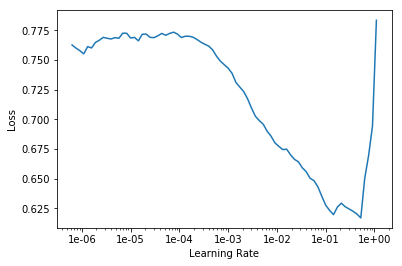

In [25]:
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(2, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.542260,0.555401,0.780000,00:25
1,0.456235,0.376684,0.830000,00:26


In [27]:
learn.save('/kaggle/working/first')

In [28]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.409211,0.365711,0.845000,00:31


In [29]:
learn.save('/kaggle/working/second')

In [30]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.305756,0.284292,0.895000,00:46


In [31]:
learn.save('/kaggle/working/third')

In [32]:
learn.unfreeze()
learn.fit_one_cycle(2, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.250906,0.247524,0.910000,00:58
1,0.224148,0.236824,0.925000,00:56


In [33]:
learn.save('/kaggle/working/fourth')

In [34]:
learn.predict("I really loved that movie, it was awesome!")

(Category pos, tensor(1), tensor([0.0081, 0.9919]))

In [35]:
learn.predict("The movie is disappointing")

(Category neg, tensor(0), tensor([0.9002, 0.0998]))

In [36]:
learn.predict("I would not recommend this movie to anyone")

(Category neg, tensor(0), tensor([0.9976, 0.0024]))

In [37]:
learn.predict("The movie was okay")

(Category neg, tensor(0), tensor([0.9243, 0.0757]))

In [38]:
learn.predict("I would feel sorry for anyone watching this movie")

(Category neg, tensor(0), tensor([0.9694, 0.0306]))

In [39]:
learn.predict("The direction was horrible")

(Category neg, tensor(0), tensor([0.9609, 0.0391]))

In [40]:
learn.predict("One would not be disappointed watching the movie.")

(Category neg, tensor(0), tensor([0.9915, 0.0085]))

In [41]:
learn.predict("One would not be disappointed watching the movie. I especially loved the part when the protagonist goes for a retreat and finds all his answers")

(Category neg, tensor(0), tensor([0.8470, 0.1530]))